#### Yuanguo Lang 09/10/2020


#### Let's have some cubic spline interpolation example

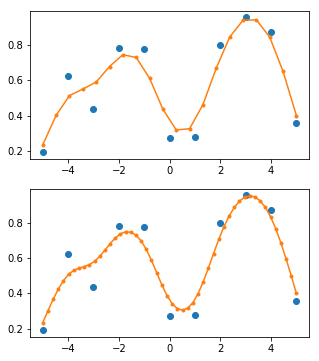

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from csaps import csaps


def univariate_data(n=25, seed=1234):
    np.random.seed(seed)
    x = np.linspace(-5., 5., n)
    y = np.zeros(n) + np.random.rand(n)
    return x, y

x, y = univariate_data(n=11)

spline = csaps(x, y)

xi1 = np.linspace(x[0], x[-1], 20)
xi2 = np.linspace(x[0], x[-1], 50)

yi1 = spline(xi1)
yi2 = spline(xi2)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))
ax1.plot(x, y, 'o', xi1, yi1, '.-')
ax2.plot(x, y, 'o', xi2, yi2, '.-')

#### Now Let's use our blink data
#### In the first plot, the red area are blinks, then we use cubic spline to generate new data in these ranges

pupil.csv
print some eye track data after *1000:  [3.73582 3.72595 3.75575 3.75371 3.73096]
n:  4222
blink on/offset:  [  54.  501.  646.  904. 1375. 1427. 3391. 3945.]
2 4.0
x_clean befoer:  (4222,)
print some delete range:  [54 55 56 57 58]
x_clean after:  (2907,)


/Users/yuanguo/MHC/BEARS LAB/pupil/based_noise_blinks_detection.py:126: RuntimeWarning: invalid value encountered in less_equal
  monotonically_dec = smooth_pupil_size_diff <= 0
/Users/yuanguo/MHC/BEARS LAB/pupil/based_noise_blinks_detection.py:127: RuntimeWarning: invalid value encountered in greater_equal
  monotonically_inc = smooth_pupil_size_diff >= 0
/Users/yuanguo/anaconda2/envs/myenv36/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


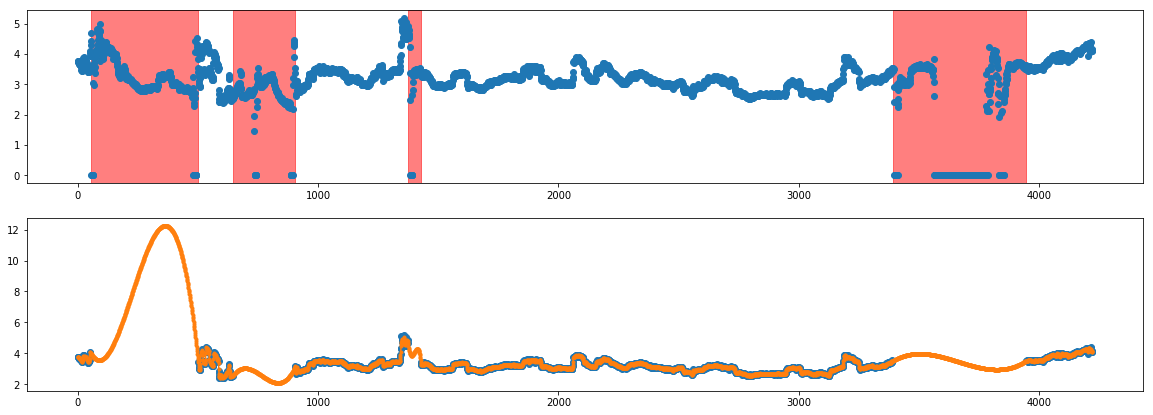

In [71]:
import csv
from based_noise_blinks_detection import based_noise_blinks_detection

filename = 'pupil.csv'
print(filename)
with open(filename, newline='') as csvfile:
    data = list(csv.reader(csvfile))


for i in range(1):
    i = 2
    
    temp = np.array(data[i], dtype="float32")*1000
    n = temp.shape[0]
    x = np.linspace(0.0, n-1, n)
    where_are_NaNs = np.isnan(temp)
    temp[where_are_NaNs] = 0
    temp = np.transpose(temp)
    y = temp
    print('print some eye track data after *1000: ', y[:5])
    print('n: ',n)
    temp = np.rint(temp)
    
    
    blinks = based_noise_blinks_detection(temp, 600)

    c = np.empty((len(blinks["blink_onset"]) + len(blinks["blink_offset"]),))
    c[0::2] = blinks["blink_onset"]
    c[1::2] = blinks["blink_offset"]
    print('blink on/offset: ', c)
    print(i, len(c)/2)
    

# remove blinks
x_clean = x
y_clean = y
print('x_clean befoer: ', x_clean.shape)
delete_range = np.array([])
for i in range(int(c.shape[0]/2)):
    delete_range = np.append(delete_range, np.linspace(c[2*i], c[2*i+1], c[2*i+1]-c[2*i]+1))
delete_range = delete_range.astype(int)
print('print some delete range: ', delete_range[:5])
x_clean = np.delete(x_clean, delete_range)
y_clean = np.delete(y_clean, delete_range)
print('x_clean after: ', x_clean.shape)  


spline = csaps(x_clean, y_clean)

xi1 = np.linspace(x[0], x[-1], n)

yi1 = spline(xi1)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 7))
ax1.plot(x, y, 'o')
for i in range(int(c.shape[0]/2)):
    ax1.axvspan(c[2*i], c[2*i+1], color='red', alpha=0.5)

ax2.plot(x_clean, y_clean, 'o', xi1, yi1, '.-')

In [72]:
mean = np.mean(yi1)
std = np.std(yi1)
print(mean, std)

3.7386267762083882 1.8553869421648175


In [74]:
f.savefig('foo.png')